## Manipulating the data
There are two important ways to manipulate these large data sets: background subtraction and symmetrisation. We shall here go through both of them, starting with background subtraction. We first need to discuss `sqw` and `dnd` objects, then we have a look at our data once more.

## A note on .sqw vs dnd objects
The data in a `sqw` object (a file or a slice/cut that is stored in memory) is a list of pixels, the calculated values of `h`, `k`, `l` and `E`, and the neutron intensities and variances. When we plot a `sqw` object, the data is binned into the chosen bins and plotted. However, the original data persits, and no information is lost, no matter which way we cut and slice a `sqw` object.
When subtracting backgroumd, we want to extrapolate the background to other regions, which is meaningless for a `sqw` object. 
To solve this problem, any `sqw` object can be converted to a `dnd` object, where the `n` is the number of dimensions. Here, we'll work with `d1d` and `d2d` objects. They are essentialy matrices with the binning defined in the cut command. Such matrices can of course be replicated and manipulated in the way we want to, to subtract the background.

Interface opened
All features have moved to hor_config
> In herbert_config (line 3)Warning: Cannot find test path, possible failed setup
!==================================================================!
!          ISIS utilities for visualization and analysis           !
!                   of neutron spectroscopy data                   !
!                          Herbert 4.0.0                           !
!------------------------------------------------------------------!
All features have moved to hor_config
!==================================================================!
!                           Horace 4.0.0                           !
!------------------------------------------------------------------!
!   Visualisation of multi-dimensional neutron spectroscopy data   !
!                                                                  !
!           R.A. Ewings, A. Buts, M.D. Le, J van Duijn,            !
!                  I. Bustinduy, and T.G. Perring                 

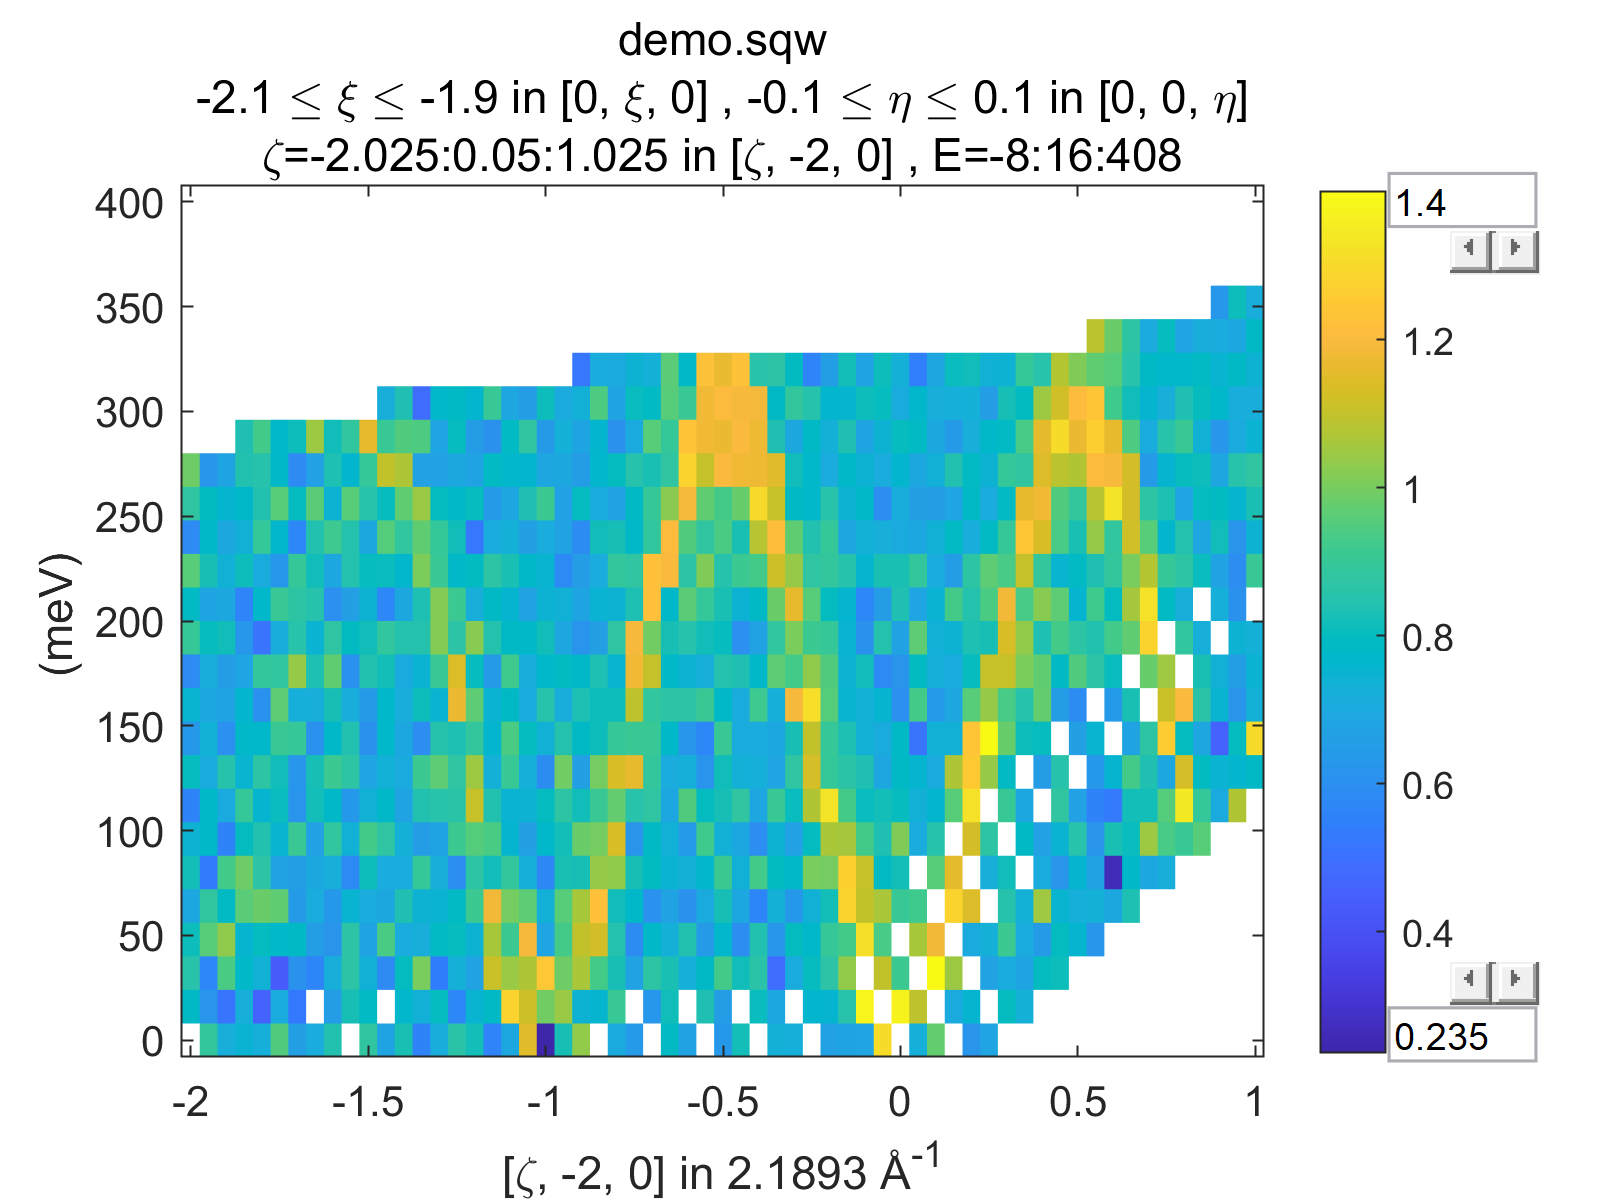

In [1]:
from pace_neutrons import Matlab
m = Matlab() 

sqw_file = 'demo.sqw'
proj = {
    'u': [1, 0, 0],
    'v': [0, 1, 0],
    'type': 'rrr'
}

%matlab_plot_mode inline inline
%matlab_fig -w 1600 -h 1200 
# 2D slice
cc2 = m.cut_sqw(sqw_file, proj, [-2, 0.05, 1], [-2-0.1, -2+0.1], [-0.1, 0.1], [0, 16, 400])
m.plot(cc2)


## Background subtraction
To subtract background, we make a 1d cut of our data set in a region with no signal, and replicate it to cover the full range of the slice. Notice that we take the cut from the 2d slice instead of the full `sqw` file. This saves time and gives the same result, as the 1d data is a subset of the 2d data. We take the cut


*** Step 1 of 1; Read data for     3501 pixels -- processing data... ----->  retained      2795 pixels


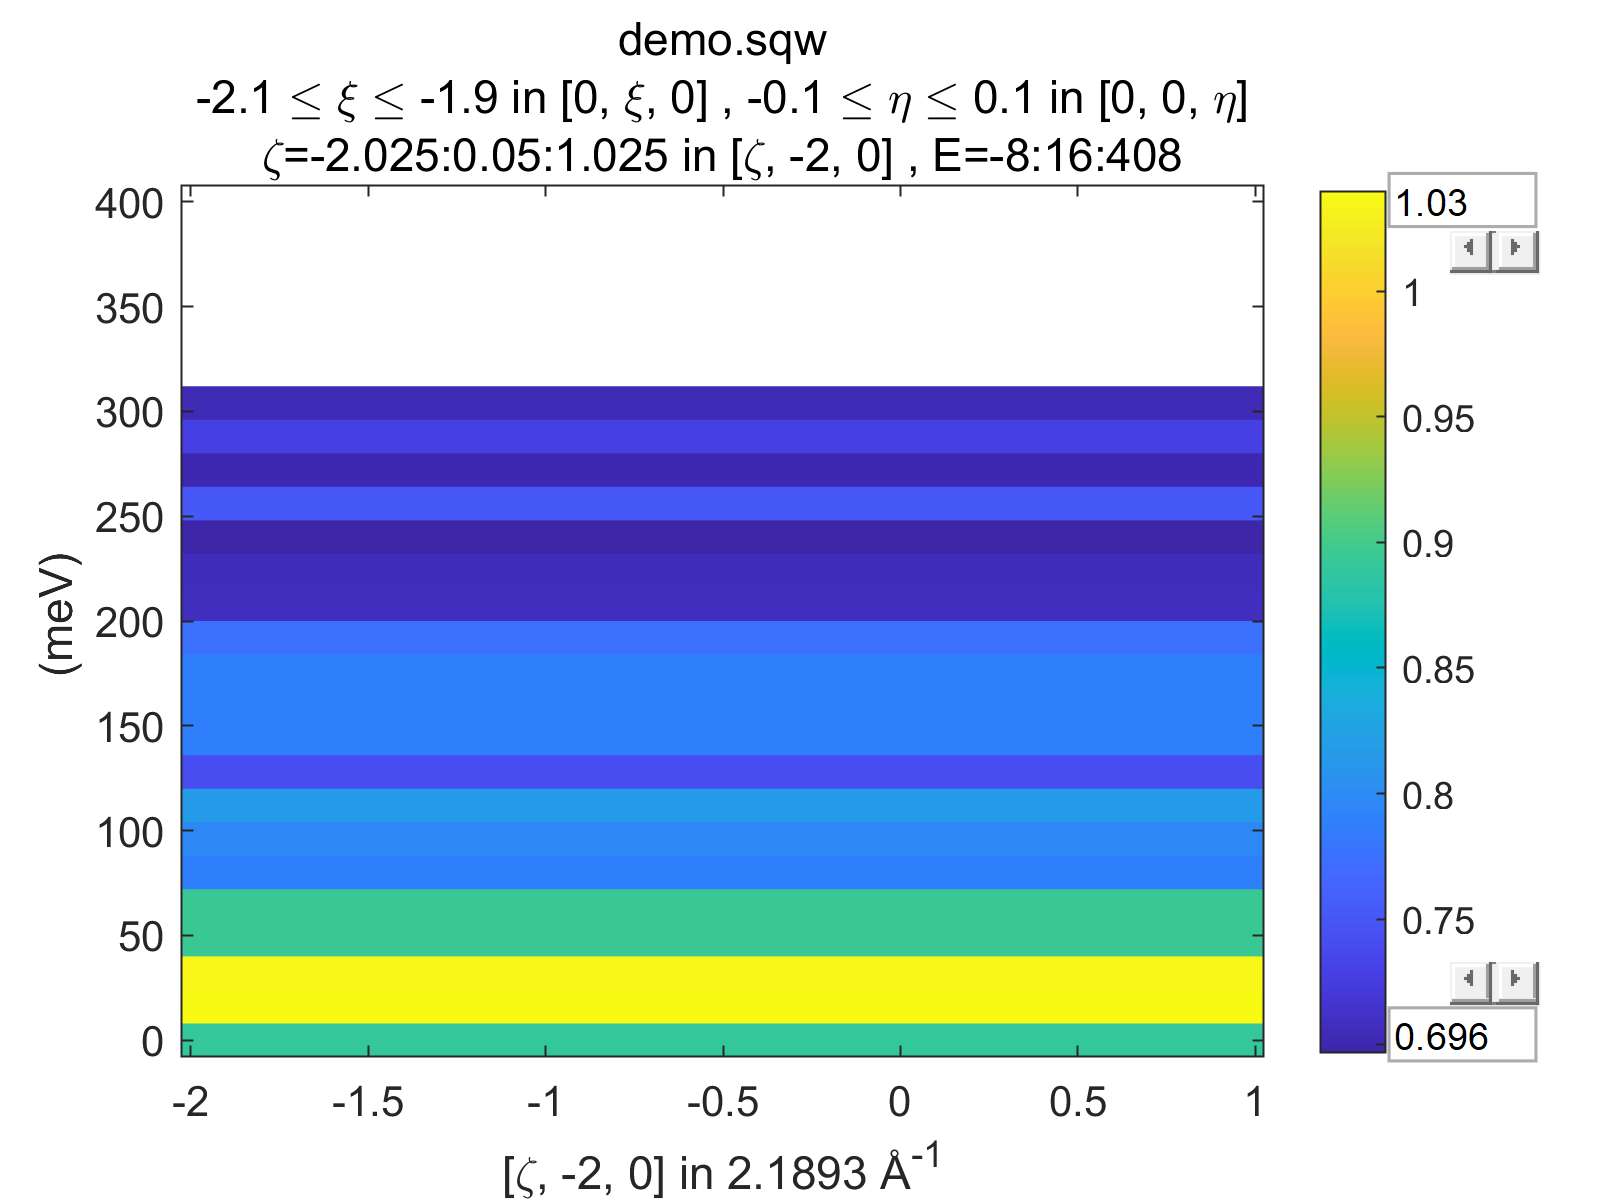

In [2]:
# Background reference
backgroundcut = m.cut(cc2, [-1.1, -0.9], [])
backgroundcut = m.d1d(backgroundcut)

# Replicate to cover full range of 2D slice
dd2 = m.d2d(cc2)
wback = m.replicate(backgroundcut, dd2)
%matlab_fig -w 1600 -h 1200 
m.plot(wback)


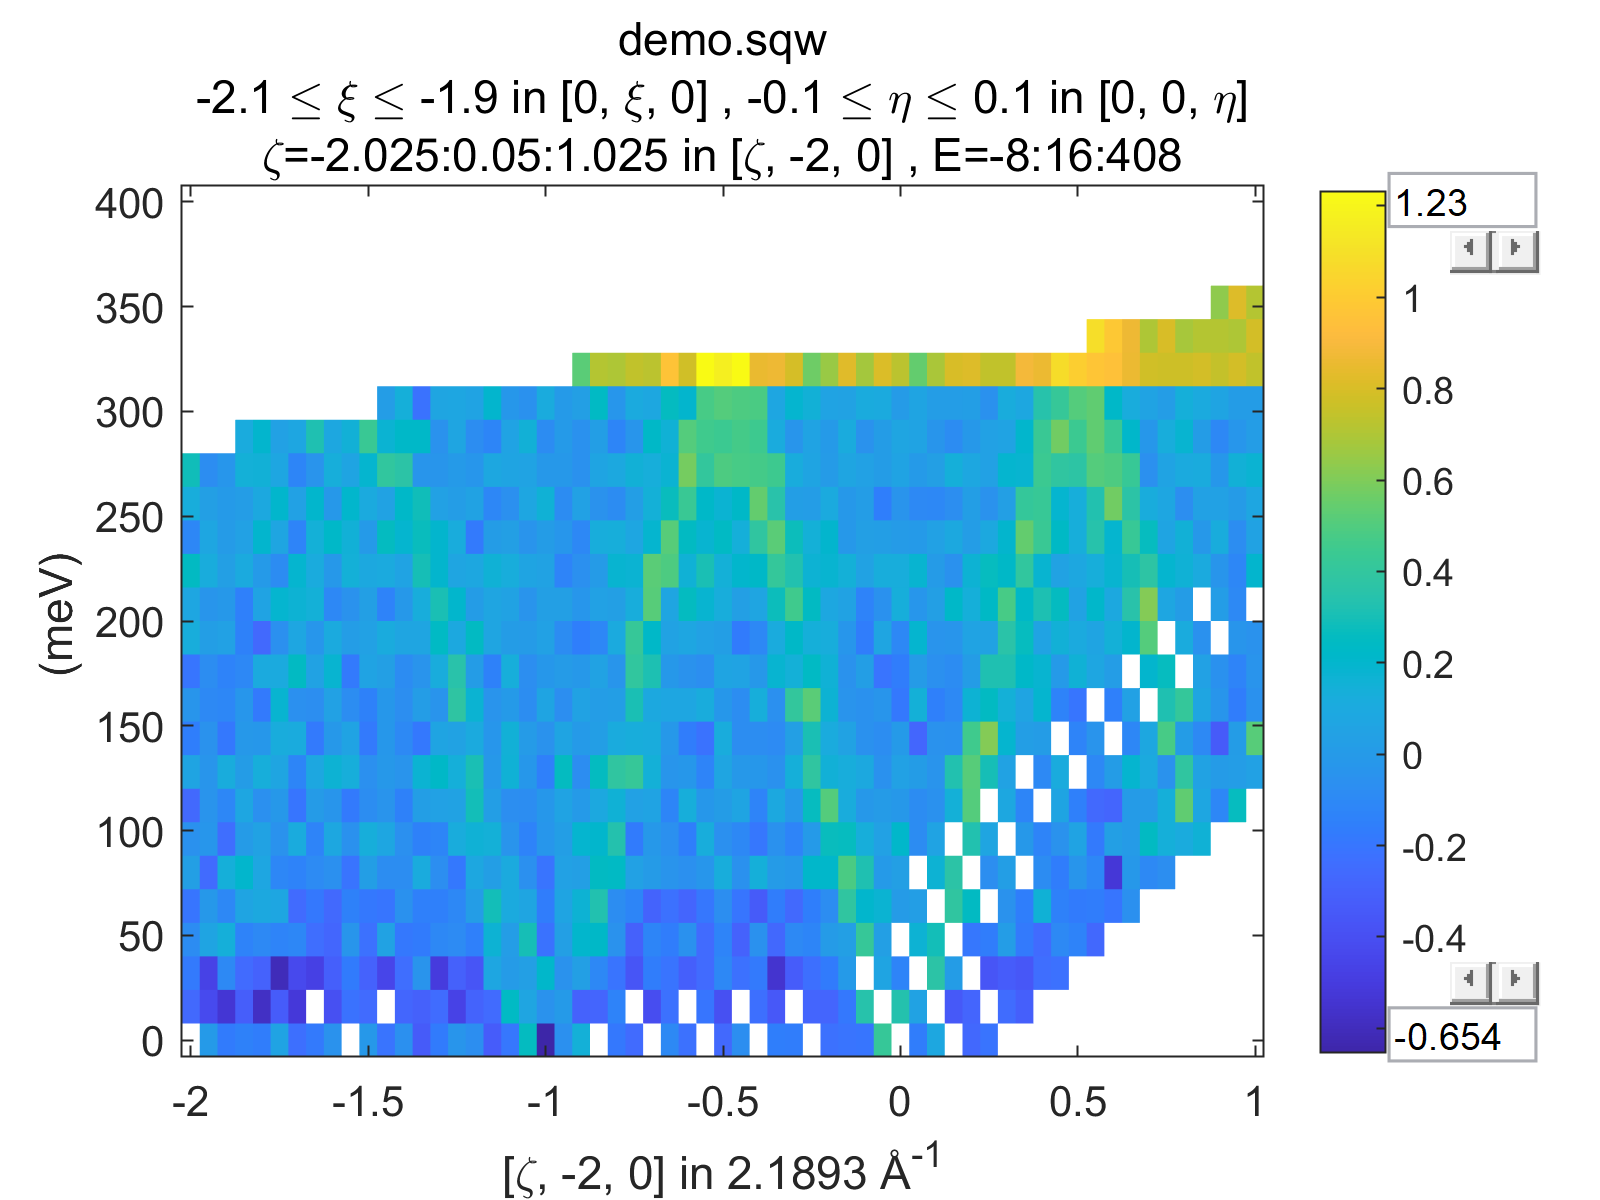

In [3]:

# Subtract from the 2D cut
wdiff = dd2 - wback
%matlab_fig -w 1600 -h 1200 
m.plot(wdiff)

## Symmetrising data
We have gaps in our data due to limited detector coverage. We can fill these gaps, and improve the overall statistics, by symmetrising our data. What this does it take data from one region in reciprocal space, and, using symmetry operations, folding it into another region. 

We shall here give a few simple examples. Details can be found in the Horace documentation: https://pace-neutrons.github.io/Horace/v4.0.0/manual/Symmetrising_etc.html 

Symmetry operations are generally defined by a matrix and an offset. Several helper classes exist to calculate these matrices, and it is highly recommended to use them.
We shall illustrate one of the more common symmetry operations: reflections across a plane. We use the `SymopReflection` class to calculate the matrix and the offset. The input is three 3-vectors; two vectors which define the plane of reflection, and a vector which defines a point on the plane (the offset). 
We shall here reflect the data in the plane spanned by `[0,1,0]` and `[0,0,1]`, offset by `[0,-2,0]`, indicated by the red line:

<img src='_images/symmetry.jpg' width='800px'></img>

*** Step 1 of 1; Read data for   107965 pixels -- processing data... ----->  retained     47529 pixels


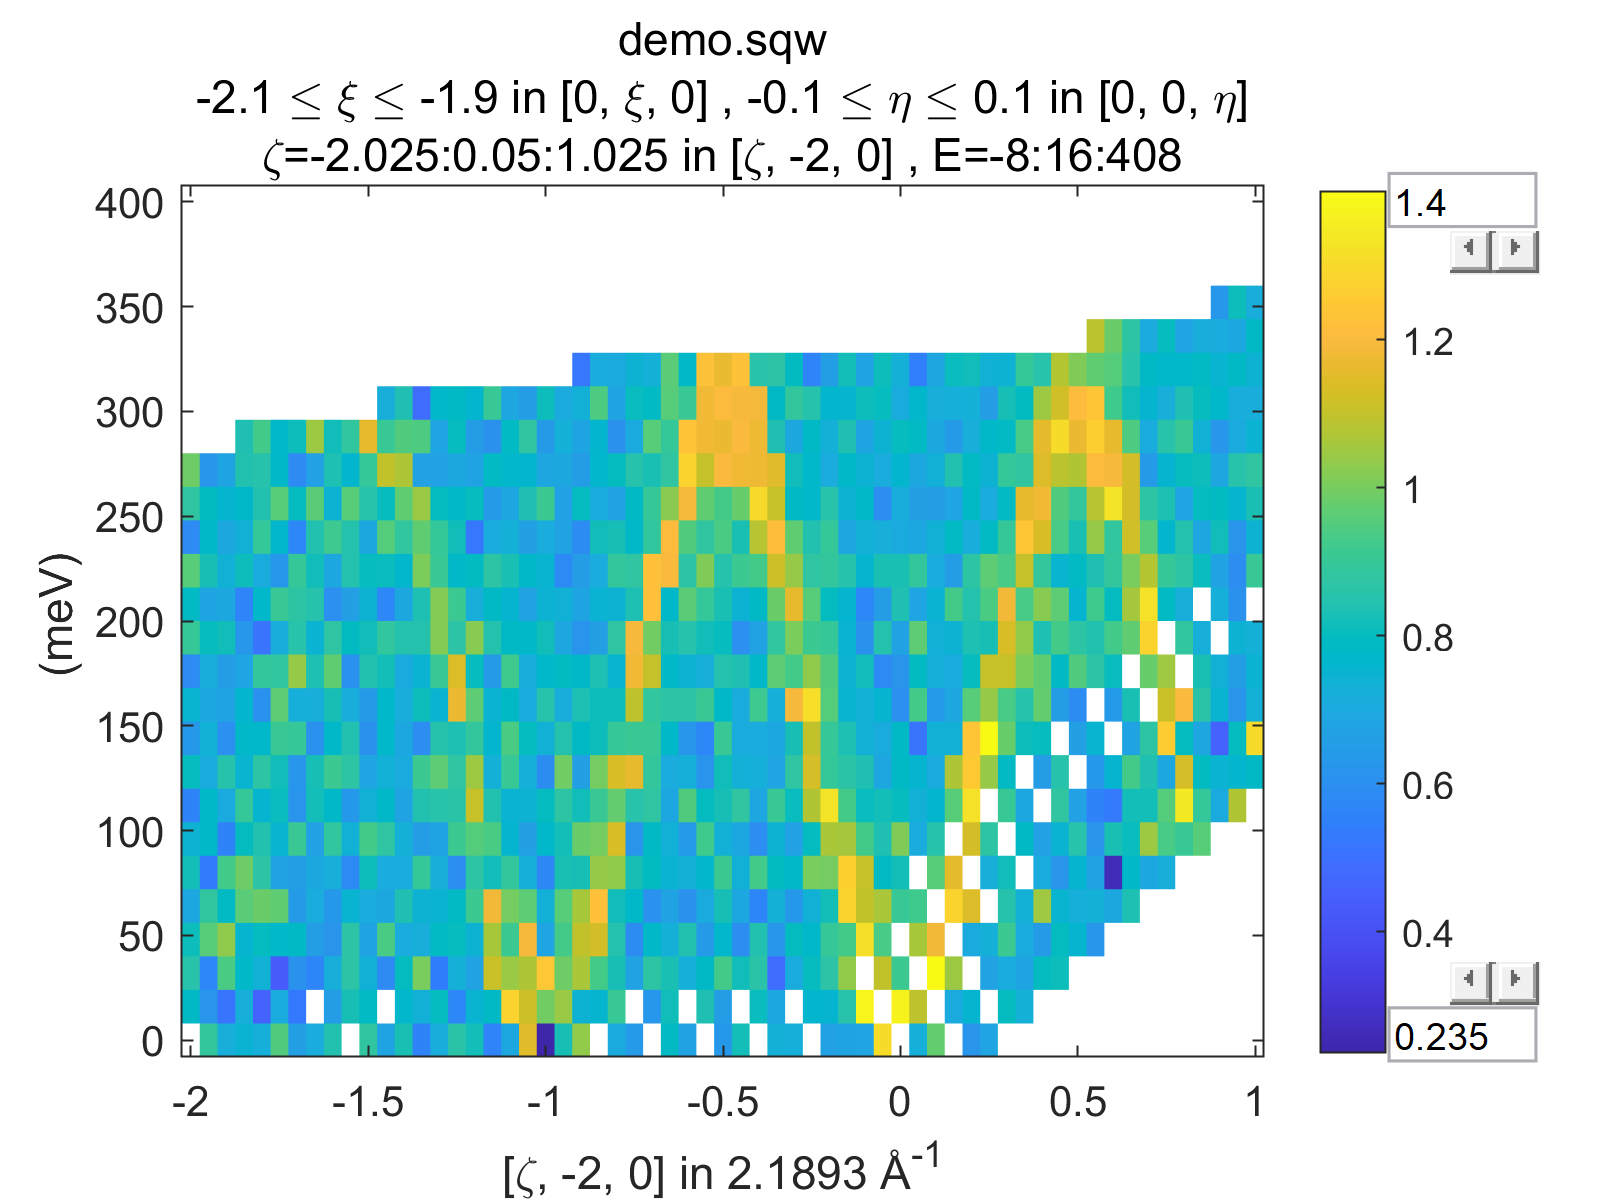

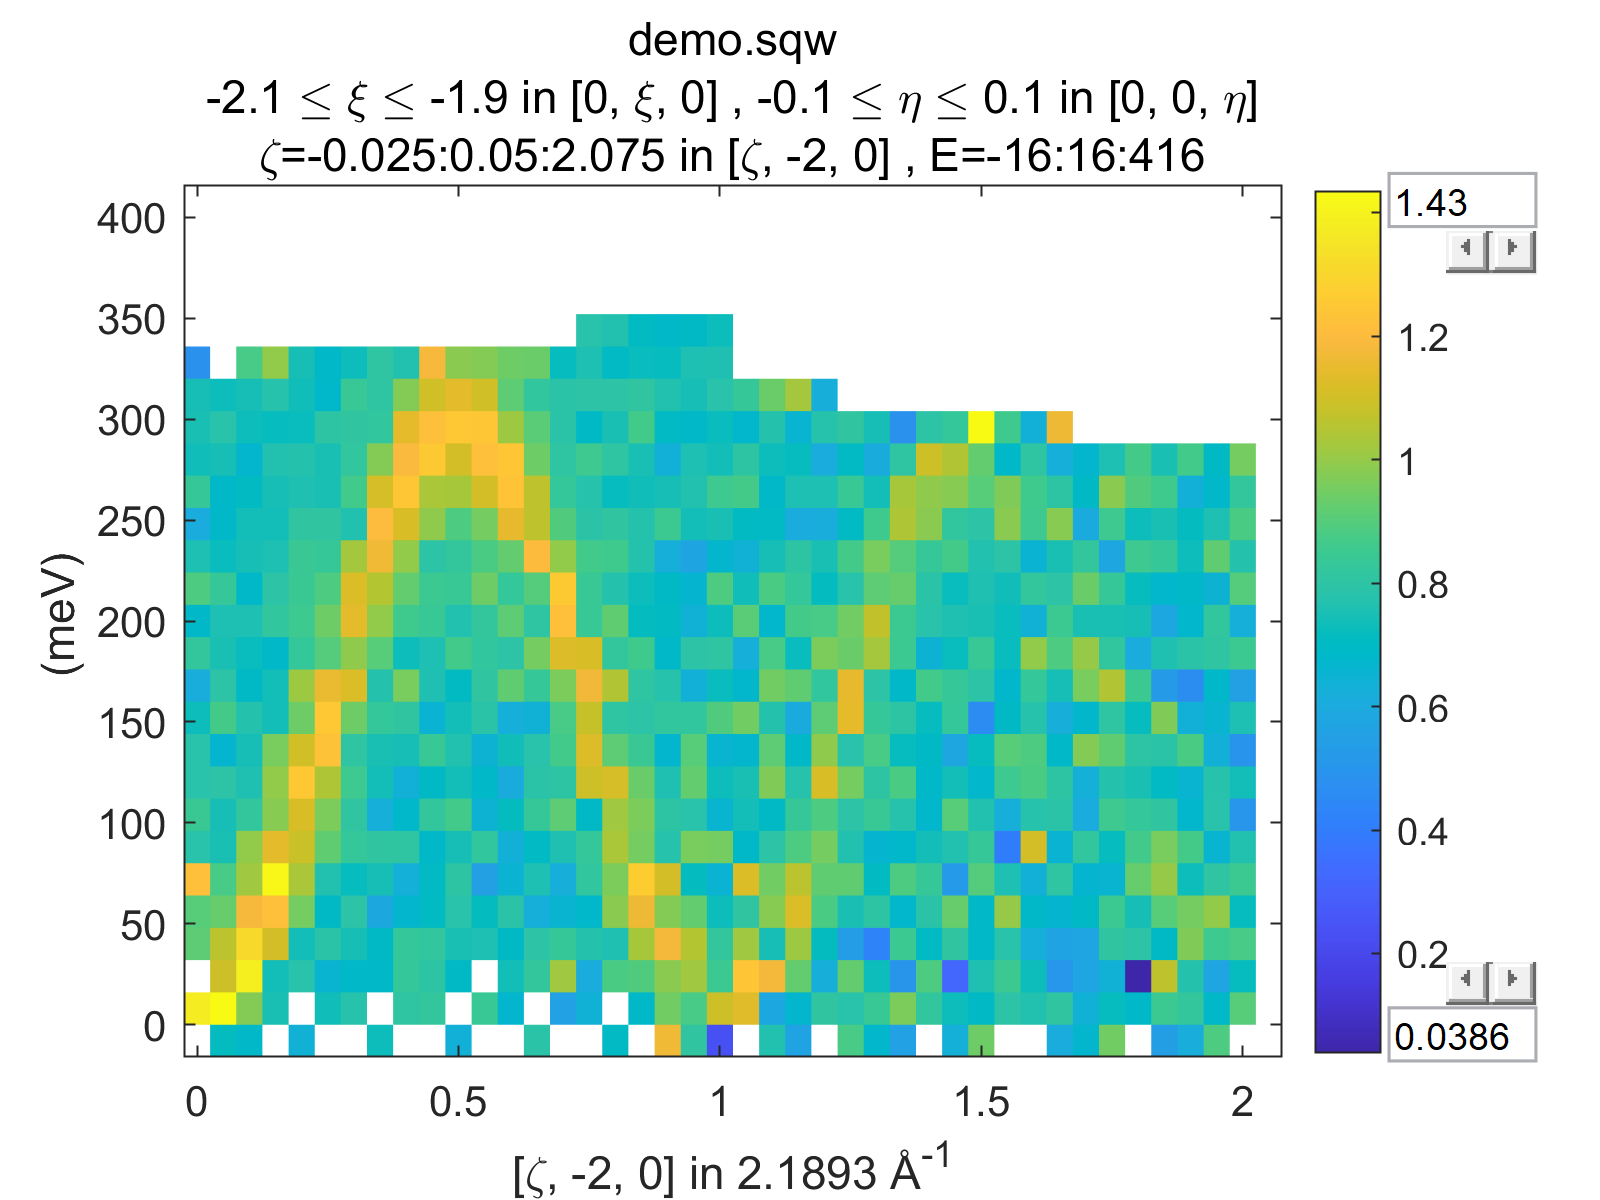

In [6]:
sym = m.SymopReflection([0, 1, 0], [0, 0, 1], [0, -2, 0]); #Define two vectors in the symmetry plane, and the offset

#Plot the un-symmetrised data
# 2D slice
cc2 = m.cut_sqw(sqw_file, proj, [-2, 0.05, 1], [-2-0.1, -2+0.1], [-0.1, 0.1], [0, 16, 400])
%matlab_fig -w 1600 -h 1200 
m.plot(cc2)
m.keep_figure()

#And the symmetrised data
w2 = m.symmetrise_sqw(cc2, sym)
%matlab_fig -w 1600 -h 1200 
m.plot(w2)
m.keep_figure()